By Tony Alexander
4/11

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.neural_network import MLPClassifier
df = pd.read_csv('diabetes.csv')
print(df.shape)
df.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [2]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [3]:
y=df['Outcome']
print(y)
df=df.drop(['Outcome'],axis=1)
x=df
print(x)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70      

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)
print(x_train.shape)
print(x_test.shape)

(537, 8)
(231, 8)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
st_x=MinMaxScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
print(x_train)

In [5]:
classifier=MLPClassifier(hidden_layer_sizes=(8,8,8,8),activation='relu',solver='adam',max_iter=500)
classifier.fit(x_train, y_train)
x_pred=classifier.predict(x_train)
y_pred=classifier.predict(x_test)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [6]:
print(y_test.values)
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1
 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 0 1 1 0 0 0]
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0
 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 1]


In [7]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[128  29]
 [ 38  36]]


In [8]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_train, x_pred)
print(cm1)

[[301  42]
 [ 80 114]]


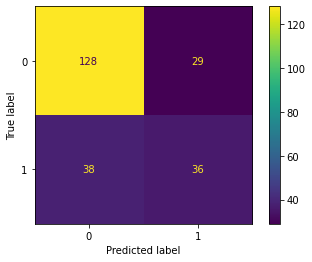

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=classifier.classes_)
disp.plot()

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred,pos_label=0)))
print('Recall score: {}'.format(recall_score(y_test, y_pred,pos_label=0)))
print('F1 score: {}'.format(f1_score(y_test, y_pred,pos_label=0)))

Accuracy score: 0.70995670995671
Precision score: 0.7710843373493976
Recall score: 0.8152866242038217
F1 score: 0.7925696594427244


In [11]:
classifier.coefs_

[array([[ 0.09072223,  0.12840481,  0.81571785,  0.54623259, -0.20026981,
          0.65652339, -0.24291977, -0.74399827],
        [-0.6331266 ,  0.00385435,  0.39476013,  0.07124269, -0.49259298,
         -0.34062843,  0.45452372, -0.09563716],
        [ 0.50003813,  0.47030774, -0.47270417, -0.47475787, -0.2211831 ,
          0.40758415, -0.54207188,  0.43186815],
        [ 0.21323299,  0.05114902, -0.34942002,  0.2948477 , -0.41030519,
          0.23130056,  0.17699023,  0.00308076],
        [-0.09740911,  0.19683517, -0.66305385, -0.19180486,  0.54171655,
         -0.55243487,  0.50570932,  0.0784307 ],
        [ 0.47114561,  0.51404004,  0.20957085,  0.22920543, -0.51802984,
          0.30867338,  0.32119965, -0.38459826],
        [-0.49954272, -0.32611898,  0.10494521,  0.18417548, -0.56458418,
          0.47851445, -0.38558997, -0.1222343 ],
        [-0.0773087 ,  0.29973226,  0.26471777,  0.58367404,  0.13520986,
         -0.20584031, -0.03355907, -0.46171885]]),
 array([[-2.33

In [12]:
classifier.intercepts_

[array([-0.01337049,  0.07463917,  0.17563482, -0.61213477,  0.11488388,
        -0.04126572, -0.2889986 ,  1.42392844]),
 array([ 0.2348621 ,  0.7852053 ,  0.32792855,  0.12185806,  0.86424808,
         0.37514114,  0.31371553, -0.23980058]),
 array([ 0.45865879, -0.42906334, -0.63760833,  0.51076051,  0.32104973,
        -0.12719331,  0.50158485,  0.08002205]),
 array([ 0.17248973, -0.13371453, -0.16597811, -0.06911638, -0.43949459,
         1.10999032, -0.45847345,  0.64174924]),
 array([-0.3991379])]